In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from myutils import *

/Users/ram/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [28]:
def get_classifier_and_encoder(folder_path):
    # Load images and labels
    folder_path = "dataset2"
    images, eng_labels = images_to_numpy_array(folder_path)
    images = images.reshape(images.shape[0], -1)

    # Normalize images and encode labels
    images = images.astype("float32") / 255.0
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(eng_labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    # Create and train the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Validation Accuracy:", accuracy)
    return clf, label_encoder
    

In [29]:
def pred(image, classifier, label_encoder):
    # Make a prediction on a single image
    image = image.reshape(1, -1)
    prediction = classifier.predict(image)
    return label_encoder.inverse_transform(prediction)[0]

In [31]:
clf, enc = get_classifier_and_encoder("dataset2")

Validation Accuracy: 0.7406483790523691


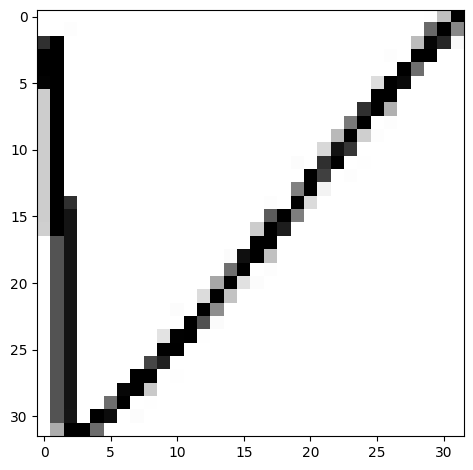

In [38]:
import skimage.io as io
test_image = io.imread("test2/upperv.png")
io.imshow(test_image)

In [39]:
print(pred(test_image, clf, enc))

upperV
